# Trabajo Práctico

Se requiere la relaización de un programa que interactúe con el usuario para recomendar lecturas. El programa ofrecerá tres opciones principales:

- Recomendación Directa:¿Qué tienes ganas de leer hoy? Mediante la clasificación de la respuesta el programa propondrá una lista de tres libros acordes a las temáticas mencionadas. Además deberá detallar el autor, género y una breve reseña de ese libro.

- Elección por Autor: Si el usuario busca por autor, el programa ofrecerá una lista de libros del autor especificado. En caso de que haya múltiples resultados, se basará en la similitud de los dos primeros resultados más relevantes, retornando dos títulos (con sus respectivas reseñas) del resultado más ercano y uno del segundo que se recomiendan para descargar.

- Elección por Género Literario: Similar a la búsqueda por autor, si el usuario elige buscar por género, el programa ofrecerá una lista de libros del género especificado. Aplicará la misma lógica de similitud para seleccionar y presentar los resultados.

<h3>Requisitos del dataset</h3>

El dataset debe tener de un mínimo de 100 libros con los siguientes datos:
-	género literario (mínimo 10) 
-	autor
-	título
-	síntesis de cada libro


In [109]:
pagina = "https://ww3.lectulandia.com/"

## Librerias

In [1]:
import requests
from bs4 import BeautifulSoup

## Página bs4

Descubrimos que los la lista de géneros brindada por la página se encuentran en una estructura section cuyo id es "secgenero".

Luego, dentro de esa sección, los géneros se encuentran listados mediante los elementos li.

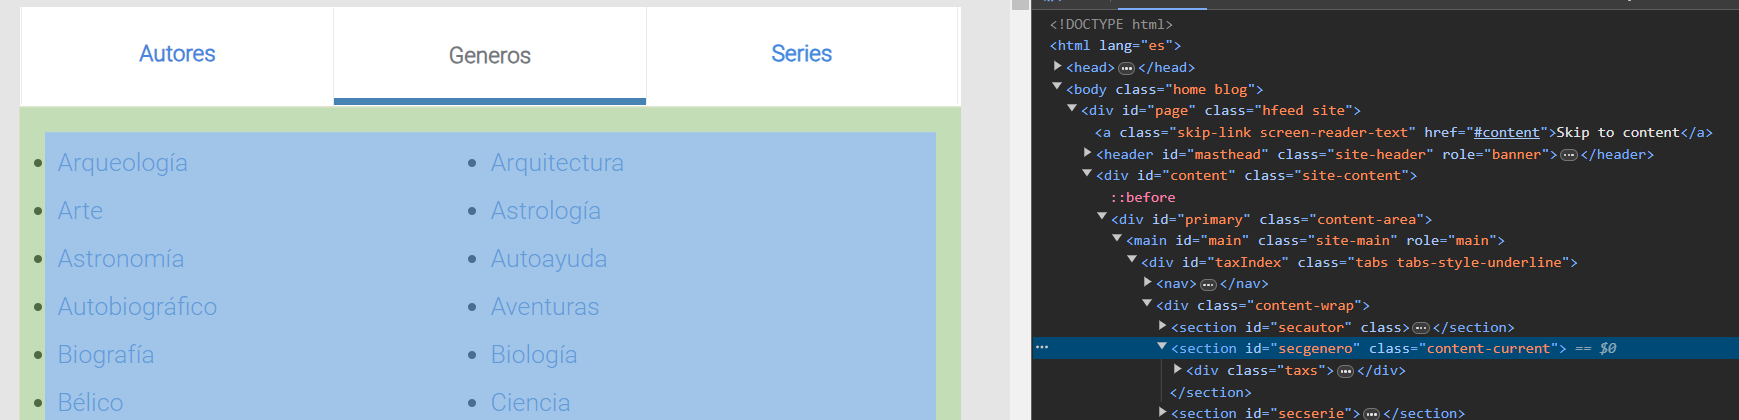

In [14]:
url = "https://ww3.lectulandia.com/"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

#Buscamos el elemento section y su contenido
letra_div = soup.find('section', id='secgenero')

#obtenemos el contenido, específicamente los géneros
generos = letra_div.find_all('li')


## Enlaces a géneros

Obtenemos los enlaces para luego poder buscar dentro de cada uno.

In [86]:
enlaces = []

for genero in generos:
  enlace = genero.find('a')
  if enlace:
    href=enlace.get('href')
    enlaces.append(href)

enlaces

['/genero/arqueologia/',
 '/genero/arquitectura/',
 '/genero/arte/',
 '/genero/astrologia/',
 '/genero/astronomia/',
 '/genero/autoayuda/',
 '/genero/autobiografico/',
 '/genero/aventuras/',
 '/genero/biografia/',
 '/genero/biologia/',
 '/genero/belico/',
 '/genero/ciencia/',
 '/genero/ciencia-ficcion/',
 '/genero/ciencias-exactas/',
 '/genero/ciencias-naturales/',
 '/genero/ciencias-sociales/',
 '/genero/cine/',
 '/genero/cinematografia/',
 '/genero/clasico/',
 '/genero/comunicacion/',
 '/genero/costumbrista/',
 '/genero/critica/',
 '/genero/critica-y-teoria-literaria/',
 '/genero/cronica/',
 '/genero/cronicas/',
 '/genero/cuentos/',
 '/genero/cultura/',
 '/genero/comic/',
 '/genero/deporte/',
 '/genero/deportes/',
 '/genero/deportes-y-juegos/',
 '/genero/diccionarios-y-enciclopedias/',
 '/genero/didactico/',
 '/genero/distopia/',
 '/genero/divulgacion/',
 '/genero/divulgacion-cientifica/',
 '/genero/drama/',
 '/genero/ecologia/',
 '/genero/economia/',
 '/genero/educacion/',
 '/genero

### Minúsculas

In [18]:
!pip install unicodedata2

   ---------------------------------------- 0.0/427.8 kB ? eta -:--:--
   ---------- ----------------------------- 112.6/427.8 kB 2.2 MB/s eta 0:00:01
   ---------------------------- ----------- 307.2/427.8 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 427.8/427.8 kB 3.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import unicodedata

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Ejemplo de uso

for e in enlaces:
  remove_accents(e)

enlaces

# Resultado: aeiouuncaoaeiouaeiou

['/genero/arqueologia/',
 '/genero/arquitectura/',
 '/genero/arte/',
 '/genero/astrologia/',
 '/genero/astronomia/',
 '/genero/autoayuda/',
 '/genero/autobiografico/',
 '/genero/aventuras/',
 '/genero/biografia/',
 '/genero/biologia/',
 '/genero/belico/',
 '/genero/ciencia/',
 '/genero/ciencia-ficcion/',
 '/genero/ciencias-exactas/',
 '/genero/ciencias-naturales/',
 '/genero/ciencias-sociales/',
 '/genero/cine/',
 '/genero/cinematografia/',
 '/genero/clasico/',
 '/genero/comunicacion/',
 '/genero/costumbrista/',
 '/genero/critica/',
 '/genero/critica-y-teoria-literaria/',
 '/genero/cronica/',
 '/genero/cronicas/',
 '/genero/cuentos/',
 '/genero/cultura/',
 '/genero/comic/',
 '/genero/deporte/',
 '/genero/deportes/',
 '/genero/deportes-y-juegos/',
 '/genero/diccionarios-y-enciclopedias/',
 '/genero/didactico/',
 '/genero/distopia/',
 '/genero/divulgacion/',
 '/genero/divulgacion-cientifica/',
 '/genero/drama/',
 '/genero/ecologia/',
 '/genero/economia/',
 '/genero/educacion/',
 '/genero

## Reemplazo de espacios por '-'

-- Como para el scraping vamos a necesitar el enlace limpio sin espacios, procedemos a reemplazar los espacion con guiones

In [21]:
for e in enlaces:
  e.replace(" ", "-")

enlaces

['/genero/arqueologia/',
 '/genero/arquitectura/',
 '/genero/arte/',
 '/genero/astrologia/',
 '/genero/astronomia/',
 '/genero/autoayuda/',
 '/genero/autobiografico/',
 '/genero/aventuras/',
 '/genero/biografia/',
 '/genero/biologia/',
 '/genero/belico/',
 '/genero/ciencia/',
 '/genero/ciencia-ficcion/',
 '/genero/ciencias-exactas/',
 '/genero/ciencias-naturales/',
 '/genero/ciencias-sociales/',
 '/genero/cine/',
 '/genero/cinematografia/',
 '/genero/clasico/',
 '/genero/comunicacion/',
 '/genero/costumbrista/',
 '/genero/critica/',
 '/genero/critica-y-teoria-literaria/',
 '/genero/cronica/',
 '/genero/cronicas/',
 '/genero/cuentos/',
 '/genero/cultura/',
 '/genero/comic/',
 '/genero/deporte/',
 '/genero/deportes/',
 '/genero/deportes-y-juegos/',
 '/genero/diccionarios-y-enciclopedias/',
 '/genero/didactico/',
 '/genero/distopia/',
 '/genero/divulgacion/',
 '/genero/divulgacion-cientifica/',
 '/genero/drama/',
 '/genero/ecologia/',
 '/genero/economia/',
 '/genero/educacion/',
 '/genero

## Funcion para extraer libros de los géneros

-- Paso a paso

1. Buscar el género
2. Extraer los nombres de los libros
3. lista[nombres] --> request.get(f"https://ww3.lectulandia.com/book/{nombre}")

In [110]:
def obtener_enlace_libros(pagina:str, enlaces_generos:list, cantidad_generos: int = None, cantidad_libros_por_genero: int = None)-> dict:
    """
    Obtiene los enlaces a los libros dentro de cada genero.
    - pagina: cadena de texto que indique la pagina.
    - enlaces_generos: lista que contenga los enlaces a los distintos generos
    - cantidad_libros_por_genero: numero de libros que se desea obtener por genero, por default es 10.
    """
    enlacesDict = {}
    cantidadGeneros = cantidad_generos if cantidad_generos is not None else 10

    for enlace in enlaces_generos[:cantidadGeneros]:
        
        respuesta = requests.get(pagina, enlace)
        main = BeautifulSoup(respuesta.text, 'html.parser').find('main', id = 'main', class_='site-main')
        tagsLibros = main.find_all(name='a', class_='card-click-target')
        
        enlacesLibros = {}
        
        cantidadLibros = cantidad_libros_por_genero if cantidad_libros_por_genero is not None else 10

        for tag in tagsLibros[:cantidadLibros]:
            href = tag.get('href')
            enlacesLibros[href[6:-1].replace("-", " ")]=href
        enlacesDict[enlace[8:-1]] = enlacesLibros
    
    return enlacesDict

In [112]:
dict = obtener_enlace_libros("https://ww3.lectulandia.com/", enlaces[:5],2, 2)

In [113]:
dict

{'arqueologia': {'mi media persona': '/book/mi-media-persona/',
  'el expediente de josef kalteis': '/book/el-expediente-de-josef-kalteis/'},
 'arquitectura': {'mi media persona': '/book/mi-media-persona/',
  'el expediente de josef kalteis': '/book/el-expediente-de-josef-kalteis/'}}

In [117]:
dict['arqueologia']['mi media persona']

'/book/mi-media-persona/'

Falta extraer autor y detalle!